In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'property_type': np.random.choice(['Apartment', 'House', 'Condo', 'Loft'], n),
    'neighbourhood_group': np.random.choice(['Downtown', 'Suburb', 'Beachside', 'Historic'], n),
    'price': np.random.randint(50, 500, n),
    'construction_year': np.random.choice(range(1950, 2021), n),
    'host_id': np.random.randint(1000, 1100, n),
    'host_identity_verified': np.random.choice(['verified', 'unverified'], n),
    'review_scores_rating': np.random.uniform(2.5, 5.0, n).round(2),
    'service_fee': np.random.randint(10, 100, n),
    'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], n),
    'availability_365': np.random.randint(0, 365, n)
})


In [36]:
#Neighborhood Group with Most Listings
print("\n Listings by Neighborhood Group:\n", df['neighbourhood_group'].value_counts())


 Listings by Neighborhood Group:
 neighbourhood_group
Downtown     267
Suburb       263
Beachside    259
Historic     211
Name: count, dtype: int64


In [37]:
#Highest Average Prices by Neighborhood Group
print("\n Avg Price by Neighborhood Group:\n", df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False))


 Avg Price by Neighborhood Group:
 neighbourhood_group
Historic     285.810427
Suburb       281.954373
Downtown     271.951311
Beachside    271.764479
Name: price, dtype: float64


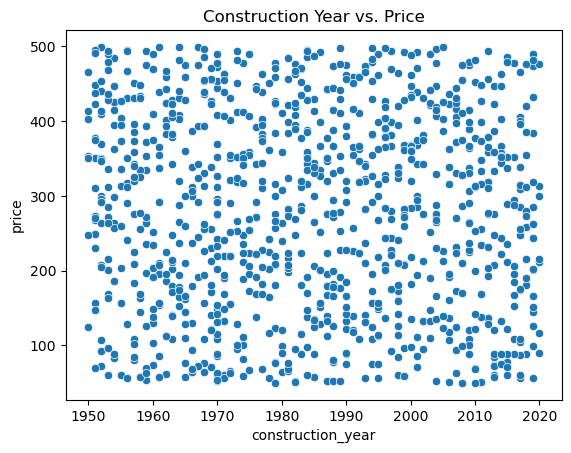

In [38]:
#Construction Year vs. Price
sns.scatterplot(data=df, x='construction_year', y='price')
plt.title("Construction Year vs. Price")
plt.show()

In [39]:
#Top 10 Hosts by Listing Count
print("\n Top 10 Hosts:\n", df['host_id'].value_counts().head(10))


 Top 10 Hosts:
 host_id
1012    18
1099    17
1046    17
1016    16
1053    16
1058    16
1027    15
1080    15
1056    15
1033    15
Name: count, dtype: int64


In [40]:
print(" Property Types:\n", df['property_type'].value_counts())

 Property Types:
 property_type
Loft         280
Apartment    258
Condo        232
House        230
Name: count, dtype: int64


In [41]:
#Verified Identity vs. Positive Reviews
print("\n Verified Identity vs. Avg Review Score:\n", df.groupby('host_identity_verified')['review_scores_rating'].mean())


 Verified Identity vs. Avg Review Score:
 host_identity_verified
unverified    3.700884
verified      3.732231
Name: review_scores_rating, dtype: float64


In [42]:
#Correlation Between Price and Service Fee
corr = df[['price', 'service_fee']].corr().iloc[0,1]
print(f"\nCorrelation between Price and Service Fee: {corr:.2f}")


Correlation between Price and Service Fee: -0.02


In [43]:
#Avg Review Score by Neighborhood & Room Type
print("\n Avg Review Score by Neighborhood & Room Type:\n", df.groupby(['neighbourhood_group', 'room_type'])['review_scores_rating'].mean().unstack())


 Avg Review Score by Neighborhood & Room Type:
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Beachside                   3.876897      3.567312     3.625949
Downtown                    3.756591      3.658539     3.769556
Historic                    3.587397      3.605000     3.732576
Suburb                      3.757195      3.770842     3.855349


In [44]:
#Avg Price by Room Type
print("\n Avg Price by Room Type:\n", df.groupby('room_type')['price'].mean())


 Avg Price by Room Type:
 room_type
Entire home/apt    272.987879
Private room       292.782235
Shared room        265.392523
Name: price, dtype: float64


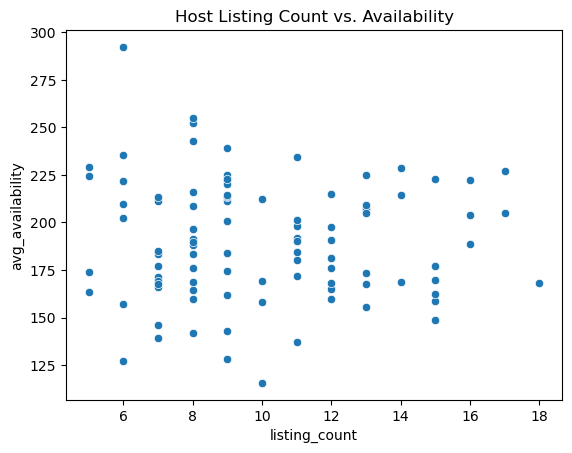

In [45]:
#Host Listing Count vs. Availability
host_counts = df['host_id'].value_counts()
host_availability = df.groupby('host_id')['availability_365'].mean()
merged = pd.DataFrame({'listing_count': host_counts, 'avg_availability': host_availability})
sns.scatterplot(data=merged, x='listing_count', y='avg_availability')
plt.title("Host Listing Count vs. Availability")
plt.show()

In [ ]:
neighborhood = input("Enter a neighborhood group (e.g., Downtown, Suburb): ")
room_type = input("Enter a room type (Entire home/apt, Private room,Hotel room or Shared room): ")
identity_status = input("Enter host identity status (verified/unverified): ")

# --- Filtered Data ---
filtered_df = df[
    (df['neighbourhood_group'] == neighborhood) &
    (df['room_type'] == room_type) &
    (df['host_identity_verified'] == identity_status)
]

print(f"\n Showing results for: {neighborhood} | {room_type} | {identity_status}")
print(f"Total listings found: {len(filtered_df)}")

# --- Price Summary ---
print("\n Price Summary:")
print(filtered_df['price'].describe())

# --- Review Score Summary ---
print("\n Review Score Summary:")
print(filtered_df['review_scores_rating'].describe())

# --- Availability Summary ---
print("\n Availability Summary:")
print(filtered_df['availability_365'].describe())

# --- Visualization: Price vs. Review Score ---
sns.scatterplot(data=filtered_df, x='price', y='review_scores_rating')
plt.title(" Price vs. Review Score")
plt.xlabel("Price")


Enter a neighborhood group (e.g., Downtown, Suburb):  Suburb
Enter a room type (Entire home/apt, Private room,Hotel room or Shared room):  Private room
